<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/teoriegrafu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teorie grafů

## Matematický popis

$$G=(V,E)$$
$V$ je množina vrcholů, $E\subseteq\{\{x,y\}|x,y \in V, x \ne y\}$ je množina hran.

Rozlišujeme neorientované a orientované grafy.

## Grafické vyjádření

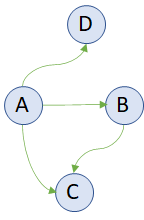

## Vyjádření ve formě incidenční matice

$$G_m=
\begin{pmatrix}
\times & 1 & 1 & 1 \\
0 & \times & 1 & 0 \\
0 & 0 & \times & 0 \\
0 & 0 & 0 & \times
\end{pmatrix}$$

Symboly $\times$ na diagonále matice představují nepřípustnost hrany, jejíž oba vrcholy jsou shodné (v některých grafech je toto možné). U existujících hran je uvedena hodnota 1, u neexistujících je uvedena hodnota 0. Řádky odpovídají vrcholům, ze kterých hrana vychází, sloupce odpovídají vrcholém, kde hrana končí.

### Vyjádření v programovacích jazycích

Vyjádření pomocí matice
```
G =[[0, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
```
Vyjádření pomocí dictionary
```
G = {
  'A': {'B': 1, 'C': 1, 'D': 1},
  'B': {'C': 1}
  }
```


## Ohodnocení hran

Velmi častým případem je matematický graf, ve kterém je ke každé hraně přiřazena hodnota. Datový typ obecně není omezen, často se ovšem předpokládá, že touto hodnotou je číslo.

Obdobně i k vrcholům muže být přiřazena hodnota.

## Hledání nejkratší cesty v grafu

Pro hledání nejkratší cesty v grafu je nutné mít jednotlivé hrany ohodnoceny číslem $f:V \to \mathbb{R}$ přičemž $f(v_i) \ge 0$. Předpokládá se, že délka žádné hrany není záporná.

Dijkstrův algoritmus

Mějme graf $G$, v němž hledáme nejkratší cestu. Řekněme, že $V$ je množina všech vrcholů grafu $G$ a&nbsp;množina $E$ obsahuje všechny hrany grafu $G$. Algoritmus pracuje tak, že si pro každý vrchol $v$ z&nbsp;$V$ pamatuje délku nejkratší cesty, kterou se k němu dá dostat. Označme tuto hodnotu jako $d[v]$. Na začátku mají všechny vrcholy $v$ hodnotu $d[v] = \infty$, kromě počátečního vrcholu $s$, který má $d[s]=0$. Nekonečno symbolizuje, že neznáme cestu k&nbsp;vrcholu.

Dále si algoritmus udržuje množiny $Z$ a&nbsp;$N$, kde $Z$ obsahuje už navštívené vrcholy a $N$ dosud nenavštívené. Algoritmus pracuje v&nbsp;cyklu tak dlouho, dokud $N$ není prázdná. V&nbsp;každém průchodu cyklu se přidá jeden vrchol $v_{min}$ z&nbsp;$N$ do&nbsp;$Z$, a&nbsp;to takový, který má nejmenší hodnotu $d[v]$ ze&nbsp;všech vrcholů $v$ z&nbsp;$N$.

Pro každý vrchol $u$, do&nbsp;kterého vede hrana (označme její délku jako $l(v_{min},u)$) z $v_{min}$, se provede následující operace: pokud $(d[v_{min}] + l(v_{min},u)) < d[u]$, pak do&nbsp;$d[u]$ přiřaď hodnotu $d[v_{min}] + l(v_{min},u)$, jinak neprováděj nic.

Když algoritmus skončí, pro každý vrchol $v$ z&nbsp;$V$ je délka jeho nejkratší cesty od počátečního vrcholu $s$ uložena v&nbsp;$d[v]$.

Převzato z [Wiki](https://cs.wikipedia.org/wiki/Dijkstr%C5%AFv_algoritmus).

### Výpočet s využitím Python

In [547]:
import networkx as nx

In [548]:
G = nx.Graph()   # neorientovaný
G = nx.DiGraph() # orientovaný
G.add_edge('A', 'B', weight=4, delka=4, doba=2.8)
G.add_edge('B', 'D', weight=2, delka=2, doba=2.5)
G.add_edge('A', 'C', weight=3, delka=3, doba=3.5)
G.add_edge('C', 'D', weight=4, delka=4, doba=4.5)
path = nx.shortest_path(G, 'A', 'D', weight='doba')
print(path)

['A', 'B', 'D']


### Základní operace nad grafem v Python

#### Výpis grafu

In [549]:
def displayGraph(G):
  for nodeid, params in G.nodes.data():
    print(nodeid, params)
  for nodeA, nodeB, params in G.edges.data():
    print(nodeA, nodeB, params)

displayGraph(G)

A {}
B {}
D {}
C {}
A B {'weight': 4, 'delka': 4, 'doba': 2.8}
A C {'weight': 3, 'delka': 3, 'doba': 3.5}
B D {'weight': 2, 'delka': 2, 'doba': 2.5}
C D {'weight': 4, 'delka': 4, 'doba': 4.5}


#### Získání atributů vrcholu

In [550]:
print(G.nodes['A'])

{}


#### Nastavení atributu u vrcholu

In [551]:
G.nodes['A']['s'] = 1
print(G.nodes['A'])

{'s': 1}


#### Získání atributů hrany

In [552]:
print(G.edges['A', 'B'])

{'weight': 4, 'delka': 4, 'doba': 2.8}


#### Nastavení atributu u hrany

In [553]:
G.edges['A', 'B']['visited'] = True
print(G.edges['A', 'B'])

{'weight': 4, 'delka': 4, 'doba': 2.8, 'visited': True}


#### Následníci z vrcholu

In [554]:
def getAscendents(G, node): # Vrací následníky vrcholu v grafu
  for item in nx.networkx.classes.function.neighbors(G, node):
    yield item
  pass

for node in getAscendents(G, 'A'):
  print(node)

B
C


#### Předchůdci z vrcholu

In [555]:
def getPrecedents(G, node): # Vrací předchůdce vrcholu v grafu
  for startNode, endNode, attributes in G.edges.data():
    if endNode == node:
      yield startNode
  pass

for node in getPrecedents(G, 'D'):
  print(node)

B
C


#### Vykreslení grafu

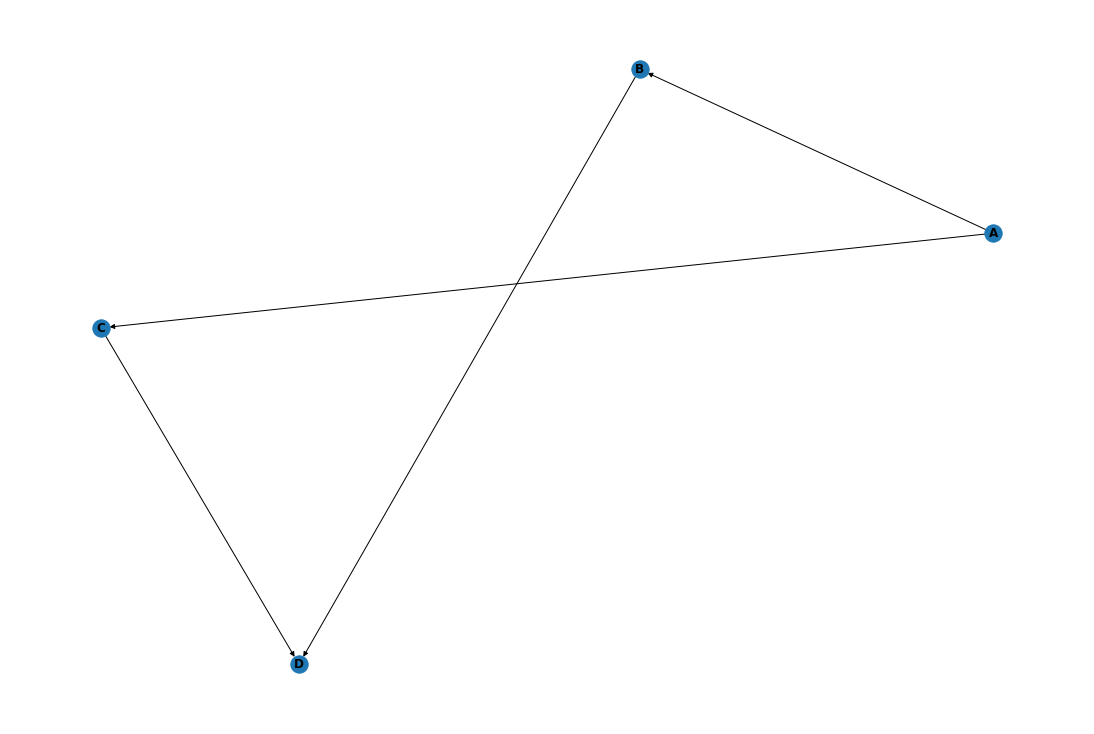

In [556]:
nx.draw(G, with_labels=True, font_weight='bold')

#### Vykreslení grafu II

In [557]:
G = nx.DiGraph()
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')
G.add_node('G')
G.add_node('H')
c = 0.01
pos = {
    'A': (c * 0, c * 50),
    'B': (c * 50, c * 25),
    'C': (c * 50, c * 75),
    'E': (c * 150, c * 25),
    'D': (c * 100, c * 50),
    'F': (c * 100, c * 100),
    'G': (c * 150, c * 75),
    'H': (c * 200, c * 50)
       }
G.add_edge('A', 'B', sigma = 1, mean = 30, current = 30)
G.add_edge('A', 'C', sigma = 3, mean = 20, current = 20)
G.add_edge('B', 'E', sigma = 2, mean = 10, current = 10)
G.add_edge('B', 'D', sigma = 4, mean = 40, current = 40)
G.add_edge('C', 'D', sigma = 1, mean = 20, current = 20)
G.add_edge('C', 'F', sigma = 2, mean = 20, current = 20)
G.add_edge('D', 'H', sigma = 3, mean = 30, current = 30)
G.add_edge('D', 'G', sigma = 1, mean = 20, current = 20)
G.add_edge('E', 'H', sigma = 4, mean = 10, current = 10)
G.add_edge('F', 'G', sigma = 2, mean = 30, current = 30)
G.add_edge('G', 'H', sigma = 2, mean = 40, current = 40)

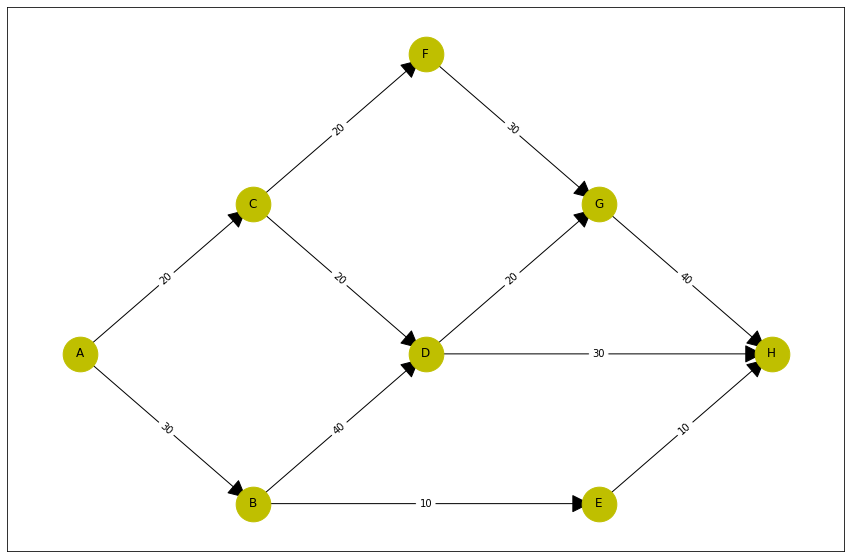

In [558]:
def printGraph(G, pos, edgeAttributeName):
  edge_labels = nx.get_edge_attributes(G, edgeAttributeName)

  _ = nx.networkx.draw_networkx_nodes(G, pos, node_color='y', node_size=1200)
  _ = nx.networkx.draw_networkx_edges(G, pos, arrowsize=40)

  _ = nx.networkx.draw_networkx_labels(G, pos)
  _ = nx.networkx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)

printGraph(G, pos, 'current')

### Příklady

#### Příklad podle WM

#### Příklad podle NP

#### Příklad podle SL

## Metoda kritické cesty (Critical path method CPM)

V této úloze hrany představují činnosti a ohodnocení hrany určuje dobu trvání činností. Vrcholy reprezentují návaznosti činností.

|ID |Předchůdci|Trvání|
|:-:|:--------:|:----:|
|A  |          |3     |
|B  |          |5     |
|C  |          |4     |
|D  |A         |9     |
|E  |C         |2     |
|F  |B, D, E   |3     |
|G  |C         |2     |
|H  |A         |14    |
|I  |H         |2     |
|J  |F, G, H   |5     |
|K  |F, G, H   |1     |
|L  |K         |9     |
|M  |I, J      |7     |
|N  |L, M      |1     |

#### Řešení v Python

In [559]:
gDict = {
    'A': {'pre': [], 'duration': 3},
    'B': {'pre': [], 'duration': 5},
    'C': {'pre': [], 'duration': 4},
    'D': {'pre': ['A'], 'duration': 9},
    'E': {'pre': ['C'], 'duration': 2},
    'F': {'pre': ['B', 'D', 'E'], 'duration': 3},
    'G': {'pre': ['C'], 'duration': 2},
    'H': {'pre': ['A'], 'duration': 14},
    'I': {'pre': ['H'], 'duration': 2},
    'J': {'pre': ['F', 'G', 'H'], 'duration': 5},
    'K': {'pre': ['F', 'G', 'H'], 'duration': 1},
    'L': {'pre': ['K'], 'duration': 9},
    'M': {'pre': ['I', 'J'], 'duration': 7},
    'N': {'pre': ['L', 'M'], 'duration': 1},
    }
c = 0.01
pos = {
    '0': (c * 0, c * 75),
    'A': (c * 50, c * 25),
    'B': (c * 50, c * 75),
    'C': (c * 50, c * 125),
    'D': (c * 100, c * 50),
    'E': (c * 100, c * 100),
    'F': (c * 125, c * 75),
    'G': (c * 150, c * 125),
    'H': (c * 150, c * 25),
    'I': (c * 200, c * 25),
    'J': (c * 200, c * 125),
    'K': (c * 200, c * 75),
    'L': (c * 250, c * 75),
    'M': (c * 250, c * 50),
    'N': (c * 300, c * 75)
       }    

0 {}
A {}
B {}
C {}
D {}
E {}
F {}
G {}
H {}
I {}
J {}
K {}
L {}
M {}
N {}
0 A {'duration': 3}
0 B {'duration': 5}
0 C {'duration': 4}
A D {'duration': 9}
A H {'duration': 14}
B F {'duration': 3}
C E {'duration': 2}
C G {'duration': 2}
D F {'duration': 3}
E F {'duration': 3}
F J {'duration': 5}
F K {'duration': 1}
G J {'duration': 5}
G K {'duration': 1}
H I {'duration': 2}
H J {'duration': 5}
H K {'duration': 1}
I M {'duration': 7}
J M {'duration': 7}
K L {'duration': 9}
L N {'duration': 1}
M N {'duration': 1}


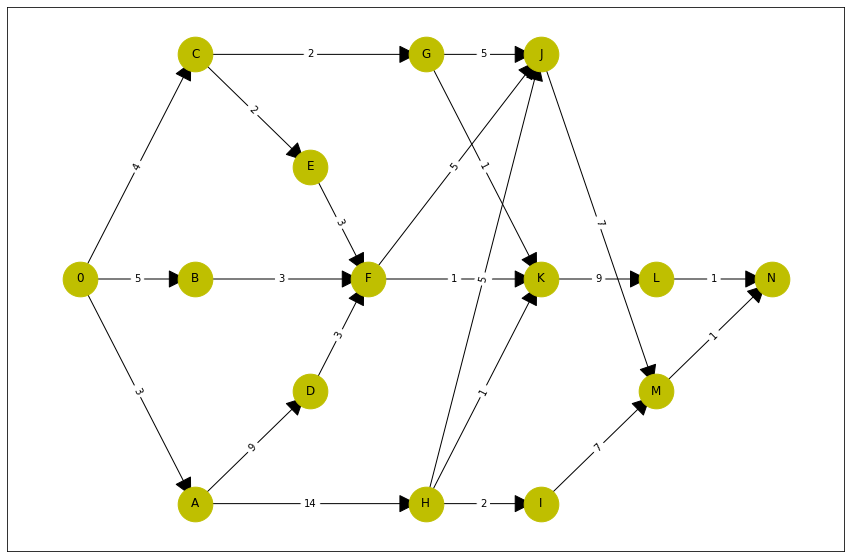

In [560]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10


def fromDictToDiGraph(desc):
  result = nx.DiGraph()
  result.add_node('0')
  for taskId, taskData in desc.items():
    result.add_node(taskId)
  for taskId, taskData in desc.items():
    prevTasks = taskData['pre']
    duration = taskData['duration']
    for prevTask in prevTasks:
      result.add_edge(prevTask, taskId, duration=duration)
    if len(prevTasks) == 0:
      result.add_edge('0', taskId, duration=duration)
  return result


G = fromDictToDiGraph(gDict)
displayGraph(G)
printGraph(G, pos, 'duration')

#### Datová incializace

In [561]:
def initStatistic(G): # Inicializuje úložiště výsledků pro jednotlivé hrany
  for id, params in G.nodes.data():
    params['deltaHistory'] = []

def initNodesData(G): # Provádí inicializaci před výpočtem CPM
  for id, params in G.nodes.data():
    params['done'] = False #
    params['lowRange'] = 0
    params['highRange'] = 1000
    params['delta'] = 1000

initStatistic(G)
initNodesData(G)
displayGraph(G)

0 {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
A {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
B {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
C {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
D {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
E {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
F {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
G {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
H {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
I {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
J {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
K {'deltaHistory': [], 'done': False, 'lowR

#### Dopředné vyhodnocení u jednoho vrcholu

In [562]:
def forwardEvaluation(G, node): # První fáze CPM u daného uzlu
  timeMax = 0
  for id in getPrecedents(G, node):
    #print('forwardEvaluation', id)
    attributes = G.nodes[id] #getNodeAttributes(G, id)
    edgeAttributes = G.get_edge_data(id, node)
    currentTime = attributes['lowRange'] + edgeAttributes['duration']
    if timeMax < currentTime:
      timeMax = currentTime
  nodeAttributes = G.nodes[node]
  nodeAttributes['lowRange'] = timeMax
  nodeAttributes['done'] = True

#### Dopředné vyhodnocení u všech vrcholů

In [563]:
def forwardEvaluationAll(G, firstNode): # První fáze CPM u všech uzlů
  forwardEvaluation(G, firstNode)

  while True:
    goDeeper = False
    nodeToEvaluate = None
    for node, attributes in G.nodes.data():
      if attributes['done'] == False:
        done = False
        nodeToEvaluate = node
        break

    if nodeToEvaluate is None:
      break

    while True:
      goDeeper = False
      pre = list(getPrecedents(G, nodeToEvaluate))
      if len(pre) == 0:
        break
      for nextNode in pre:
        nextNodeAttributes = G.nodes[nextNode]
        if nextNodeAttributes['done'] == False:
          nodeToEvaluate = nextNode
          goDeeper = True
          break
      if goDeeper == False:
        break

    forwardEvaluation(G, nodeToEvaluate)    

#### Zpětné vyhodnocení jednoho vrcholu

In [564]:
def backwardEvaluation(G, node): # Druhá fáze CPM u daného uzlu
  timeMin = 1000
  for id in getAscendents(G, node):
    attributes = G.nodes[id]
    edgeAttributes = G.get_edge_data(node, id)
    currentTime = attributes['highRange'] - edgeAttributes['duration']
    #print(node, id, currentTime)
    if timeMin > currentTime:
      timeMin = currentTime
    #print(node, id, edgeAttributes)
  nodeAttributes = G.nodes[node]
  nodeAttributes['highRange'] = timeMin
  nodeAttributes['done'] = True
  #print(nodeAttributes)

#### Zpětné vyhodnocení všech vrcholů

In [565]:
def backwardEvaluationAll(G, firstNode): # Druhá fáze CPM pro všechny uzly
  attributes = G.nodes[firstNode]
  attributes['highRange'] = attributes['lowRange']
  attributes['done'] = True
  attributes = G.nodes[firstNode]

  while True:
    done = True
    nodeToEvaluate = None
    for node, attributes in G.nodes.data():
      if attributes['done'] == False:
        done = False
        nodeToEvaluate = node
        break

    if nodeToEvaluate is None:
      break

    while True:
      goDeeper = False
      asc = list(getAscendents(G, nodeToEvaluate))
      if len(asc) == 0:
        break
      for nextNode in asc:
        nextNodeAttributes = G.nodes[nextNode]
        if nextNodeAttributes['done'] == False:
          nodeToEvaluate = nextNode
          goDeeper = True
          break
      if goDeeper == False:
        break

    backwardEvaluation(G, nodeToEvaluate)

#### Metoda CPM

In [566]:
def cpm(G): # Kompletní metoda CPM
  initNodesData(G) # inicializace uzlů
  forwardEvaluationAll(G, '0') # První fáze u všech uzlů
  for id, params in G.nodes.data(): # nastavení příznaku "Hotovo" pro druhou fázi
    params['done'] = False #
  backwardEvaluationAll(G, 'N') # Druhá fáze
  for id, params in G.nodes.data(): # Vyhodnocení rezerv pro všechny uzly
    params['delta'] = params['highRange'] - params['lowRange']

cpm(G)    
displayGraph(G)

0 {'deltaHistory': [], 'done': True, 'lowRange': 0, 'highRange': 0, 'delta': 0}
A {'deltaHistory': [], 'done': True, 'lowRange': 3, 'highRange': 3, 'delta': 0}
B {'deltaHistory': [], 'done': True, 'lowRange': 5, 'highRange': 14, 'delta': 9}
C {'deltaHistory': [], 'done': True, 'lowRange': 4, 'highRange': 12, 'delta': 8}
D {'deltaHistory': [], 'done': True, 'lowRange': 12, 'highRange': 14, 'delta': 2}
E {'deltaHistory': [], 'done': True, 'lowRange': 6, 'highRange': 14, 'delta': 8}
F {'deltaHistory': [], 'done': True, 'lowRange': 15, 'highRange': 17, 'delta': 2}
G {'deltaHistory': [], 'done': True, 'lowRange': 6, 'highRange': 17, 'delta': 11}
H {'deltaHistory': [], 'done': True, 'lowRange': 17, 'highRange': 17, 'delta': 0}
I {'deltaHistory': [], 'done': True, 'lowRange': 19, 'highRange': 22, 'delta': 3}
J {'deltaHistory': [], 'done': True, 'lowRange': 22, 'highRange': 22, 'delta': 0}
K {'deltaHistory': [], 'done': True, 'lowRange': 18, 'highRange': 20, 'delta': 2}
L {'deltaHistory': [], 

In [567]:
comprehension = (((e[0], e[1]), e[2]['duration']) for e in G.edges.data())
print(dict(comprehension))
print(nx.get_edge_attributes(G, 'duration'))

{('0', 'A'): 3, ('0', 'B'): 5, ('0', 'C'): 4, ('A', 'D'): 9, ('A', 'H'): 14, ('B', 'F'): 3, ('C', 'E'): 2, ('C', 'G'): 2, ('D', 'F'): 3, ('E', 'F'): 3, ('F', 'J'): 5, ('F', 'K'): 1, ('G', 'J'): 5, ('G', 'K'): 1, ('H', 'I'): 2, ('H', 'J'): 5, ('H', 'K'): 1, ('I', 'M'): 7, ('J', 'M'): 7, ('K', 'L'): 9, ('L', 'N'): 1, ('M', 'N'): 1}
{('0', 'A'): 3, ('0', 'B'): 5, ('0', 'C'): 4, ('A', 'D'): 9, ('A', 'H'): 14, ('B', 'F'): 3, ('C', 'E'): 2, ('C', 'G'): 2, ('D', 'F'): 3, ('E', 'F'): 3, ('F', 'J'): 5, ('F', 'K'): 1, ('G', 'J'): 5, ('G', 'K'): 1, ('H', 'I'): 2, ('H', 'J'): 5, ('H', 'K'): 1, ('I', 'M'): 7, ('J', 'M'): 7, ('K', 'L'): 9, ('L', 'N'): 1, ('M', 'N'): 1}


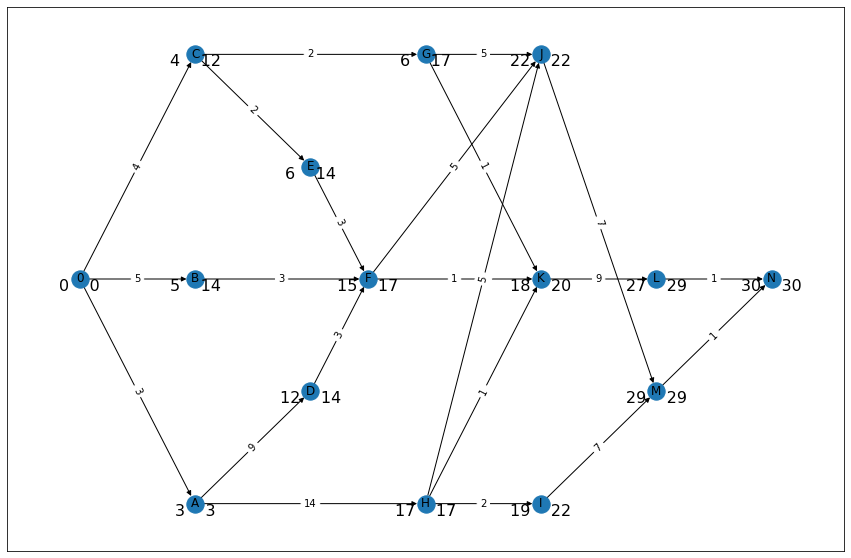

In [568]:
nx.drawing.nx_pylab.draw_networkx(G, pos)
edge_labels = nx.get_edge_attributes(G, 'duration')

labelFromNodeData = lambda nd: str(nd['lowRange']) + '    ' + str(nd['highRange'])

node_labels = {n[0]: labelFromNodeData(n[1]) for n in G.nodes.data()}
#print(node_labels)

nx.drawing.nx_pylab.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.drawing.nx_pylab.draw_networkx_labels(G, pos, labels=node_labels, verticalalignment='top', font_size=16);

In [569]:
for edge in G.edges.data():
  startNode = G.nodes[edge[0]]
  endNode = G.nodes[edge[1]]
  edge[2]['earlyStart'] = startNode['lowRange']
  edge[2]['lateStart'] = startNode['highRange']
  edge[2]['earlyEnd'] = endNode['lowRange']
  edge[2]['lateEnd'] = endNode['highRange']
  edge[2]['spareTime'] = startNode['highRange'] - startNode['lowRange']
  #print(startNode, endNode)
  print(edge)

('0', 'A', {'duration': 3, 'earlyStart': 0, 'lateStart': 0, 'earlyEnd': 3, 'lateEnd': 3, 'spareTime': 0})
('0', 'B', {'duration': 5, 'earlyStart': 0, 'lateStart': 0, 'earlyEnd': 5, 'lateEnd': 14, 'spareTime': 0})
('0', 'C', {'duration': 4, 'earlyStart': 0, 'lateStart': 0, 'earlyEnd': 4, 'lateEnd': 12, 'spareTime': 0})
('A', 'D', {'duration': 9, 'earlyStart': 3, 'lateStart': 3, 'earlyEnd': 12, 'lateEnd': 14, 'spareTime': 0})
('A', 'H', {'duration': 14, 'earlyStart': 3, 'lateStart': 3, 'earlyEnd': 17, 'lateEnd': 17, 'spareTime': 0})
('B', 'F', {'duration': 3, 'earlyStart': 5, 'lateStart': 14, 'earlyEnd': 15, 'lateEnd': 17, 'spareTime': 9})
('C', 'E', {'duration': 2, 'earlyStart': 4, 'lateStart': 12, 'earlyEnd': 6, 'lateEnd': 14, 'spareTime': 8})
('C', 'G', {'duration': 2, 'earlyStart': 4, 'lateStart': 12, 'earlyEnd': 6, 'lateEnd': 17, 'spareTime': 8})
('D', 'F', {'duration': 3, 'earlyStart': 12, 'lateStart': 14, 'earlyEnd': 15, 'lateEnd': 17, 'spareTime': 2})
('E', 'F', {'duration': 3, '

In [570]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection


nodesData = ({'x': index, 'yl': node[1]['lowRange'], 'width': node[1]['highRange']} for index, node in enumerate(G.nodes.data()))
print(nodesData)
#rectangles = [Rectangle((node[1]['lowRange'], index), node[1]['highRange'] - node[1]['lowRange'], 1) for node in nodesData]
#pc = PatchCollection(rectangles, facecolor='r', edgecolor='None')

#fig, ax = plt.subplots(1)
#ax.plot([1, 2, 3], [1, 4, 6])
#ax.add_collection(pc)

<generator object <genexpr> at 0x7fb1eed16ca8>


### Příklad

|Id| Název| Předchůdci| Trvání|
|:-:|:-:|:-:|:-:|
|A| Výkopy| —| 2 týdny|
|B| Základní deska |A| 4 týdny|
|C| Hrubé zdění| B| 10 týdnů|
|D| Střechy| C| 6 týdnů|
|E| Vnější výplně otvorů| C| 4 týdny|
|F| Vnitřní výplně otvorů| E| 5 týdnů|
|G| Fasáda| D| 7 týdnů|
|H| Detailní vnější úpravy| E, G| 9 týdnů|
|I| Elektrické rozvody| C| 7 týdnů|
|J| Vnitřní omítky| F, I| 8 týdnů|
|K| Podlahy| J| 4 týdny|
|L| Detailní vnitřní úpravy| J| 5 týdnů|
|M| Instalace vnějšího osvětlení| H| 2 týdny|
|N| Instalace cnitřního osvětlení| K, L| 6 týdnů|

### Příklad

|Id| Název| Předchůdci| Trvání|
|:-:|:-:|:-:|:-:|
|A| Potvrdit hlavního speakera a téma| —| 5 dnů|
|B| Připravit leták | -| 1 den|
|C| Poslat dopis ostatním vystupujícím| B| 1 den|
|D| Získat potvrzení od vystupujících| C| 5 dnů|
|E| Poslat dopis účastníkům| C, D| 2 dny|
|F| Získat plán cesty od vystupujících| D| 2 dny|
|G| Zajistit ubytování pro vystupující| F| 1 den|
|H| Získat od vystupujících prezentace| F| 4 dny|
|I| Ukončit registrace| G,H| 10 dnů|
|J| Připravit místnost a AV techniku| I| 1 den|
|K| Realizovat program| J| 1 den|


### Příklad

## Metoda PERT

https://www.nasa.gov/pdf/741989main_Analytic%20Method%20for%20Risk%20Analysis%20-%20Final%20Report.pdf


**P**roject **E**valuation and **R**eview **T**echnique
Při použití metody PERT se u každého úkolu stanovují tři ukazatele
- střední odhad trvání ($b$)
- optimistický odhad trvání ($a$)
- pesimistický odhad trvání ($c$)

K modelování pravděpodobnostního rozložení doby trvání činnosti se používá Beta rozdělení.
https://en.wikipedia.org/wiki/PERT_distribution

Očekávaný čas počítáme jako
$$t=\frac{a+4b+c}{6}$$

Standardní odchylku

$$\sigma=\frac{c-a}{6}$$

Pro součet se používají následující vztahy
$$T=\sum_{i=0}^n t_i$$
$$\Sigma=\sqrt{\sum_{i=0}^n \sigma_i^2} $$

Celý výpočet je shodný s metodou CPM s tím, že součástí výpočtu jsou i ukazatele $t_i$ a $\sigma_i$, které umožňují pracovat s pravděpodobnostmi trvání činností.


![o](https://wikimedia.org/api/rest_v1/media/math/render/svg/7a94b51abd577174de8d05ff8cad24fcb01c916e)

![p](https://wikimedia.org/api/rest_v1/media/math/render/svg/113eb11600ecf459b72c79d56b3377f4c608ac39)

![q](https://wikimedia.org/api/rest_v1/media/math/render/svg/3c236587c6c920b883cee9e71b233cb97e150df7)

### Křivka rozložení pravděpodobnosti

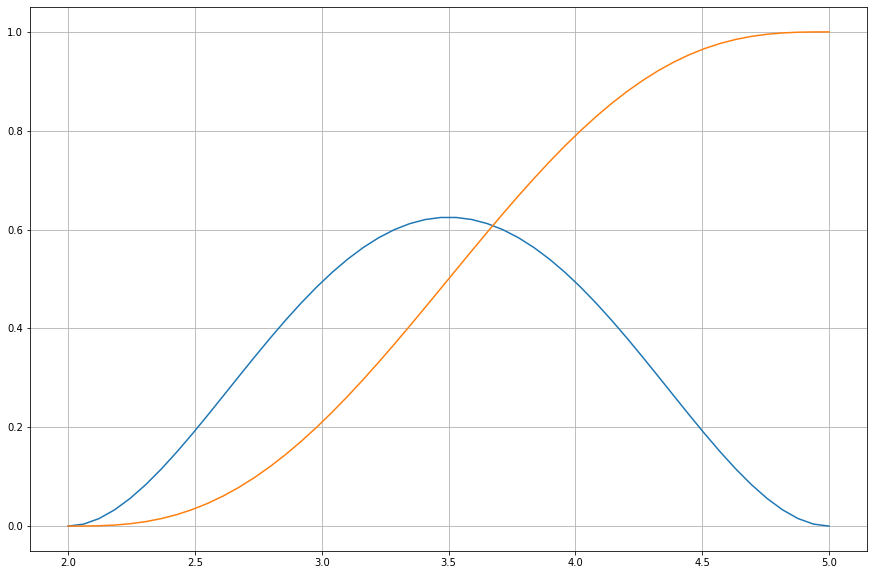

In [571]:
import numpy as np
from math import sqrt
from scipy.stats import beta as beta_disc
import matplotlib.pyplot as plt

def createPertCdf(optimistic, mostlikely, pesimistic, lam = 4, cdf=True):
  alpha = 1 + lam * (mostlikely - optimistic) / (pesimistic - optimistic)
  beta = 1 + lam * (pesimistic - mostlikely) / (pesimistic - optimistic)
  
  mean = (optimistic + lam * mostlikely + pesimistic) / (2 + lam)
  var = (mean - optimistic) * (pesimistic - mean) / (3 + lam)

  #skew = 2 * (beta - alpha) * sqrt(alpha + beta + 1) / ((alpha + beta + 2) * sqrt(alpha * beta))
  #kurt = (lamb + 2) * (
  #    ((alpha - beta)**2) * (alpha + beta + 1) + alpha * beta * (alpha + beta + 2)
  #    ) / (alpha * beta * (alpha + beta + 2) * (alpha + beta + 3))

  range = pesimistic - optimistic
  def pdff(value):
    x = (value - optimistic) / range
    result = beta_disc.pdf(x, alpha, beta) / range
    return result

  def cdff(value):
    x = (value - optimistic) / range
    result = beta_disc.cdf(x, alpha, beta)
    return result
  if cdf:
    return cdff
  else:
    return pdff

def plotPertA(optimistic=2, mostlikely=3.5, pesimistic=5, cdf=False):
  #optimistic = 2
  #mostlikely = 3.5
  #pesimistic = 5
  cdfF = createPertCdf(optimistic, mostlikely, pesimistic)
  pdfF = createPertCdf(optimistic, mostlikely, pesimistic, cdf=False)
  x = np.linspace(optimistic, pesimistic)
  y = [cdfF(value) for value in x]
  y2 = [pdfF(value) for value in x]

  plt.plot(x, y2)
  if cdf:
    plt.plot(x, y)
  plt.grid('both')

#plotPertA(optimistic=2, mostlikely=3.5, pesimistic=5)  
plotPertA(optimistic=2, mostlikely=3.5, pesimistic=5, cdf=True)  

### Odvození parametrů pro symetrickou hustotu pravděpodobnosti

Jestliže předpokládáme, že $b-a=c-b$, potom $\alpha=\beta$.

$$t=\frac{a+4b+c}{6}$$
$$b-a=c-b$$
$$c+a=2b$$
$$t=\frac{a+c+4b}{6}$$
$$t=\frac{2b+4b}{6}$$
$$t=b$$

Standardní odchylka
$$\sigma=\frac{c-a}{6}$$
můžeme vyjádřit jako
$$\sigma=\frac{(c-b)+(b-a)}{6}$$
s využitím podmínky
$$b-a=c-b$$
dostáváme
$$\sigma=\frac{(c-b)}{3}$$
$$3\sigma=(c-b)$$
a tedy horní hranice
$$c=b+3\sigma$$
ze stejné rovnice
$$3\sigma=(c-b)$$
spolu s
$$b-a=c-b$$
dostáváme
$$3\sigma=(b-a)$$
a tedy dolní hranice
$$a=b-3\sigma$$



### Hustota pravděpodobnosti pro různá $\sigma$

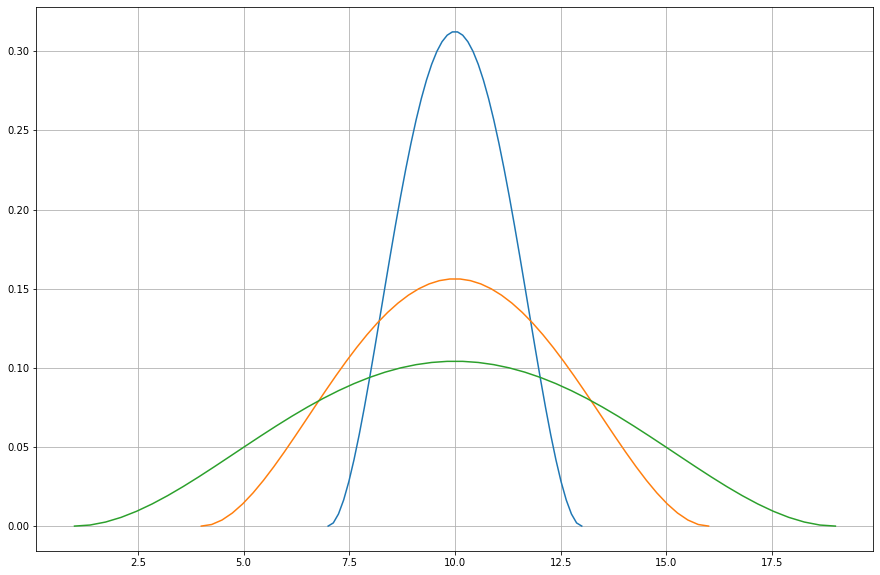

In [572]:
def plotPertB(t, sigma, cdf=False):
  plotPertA(optimistic=t-3*sigma, mostlikely=t, pesimistic=t+3*sigma, cdf=cdf)  

plotPertB(10, 1)
plotPertB(10, 2)
plotPertB(10, 3)

### Pravděpodobnosti pro násobky $\sigma$

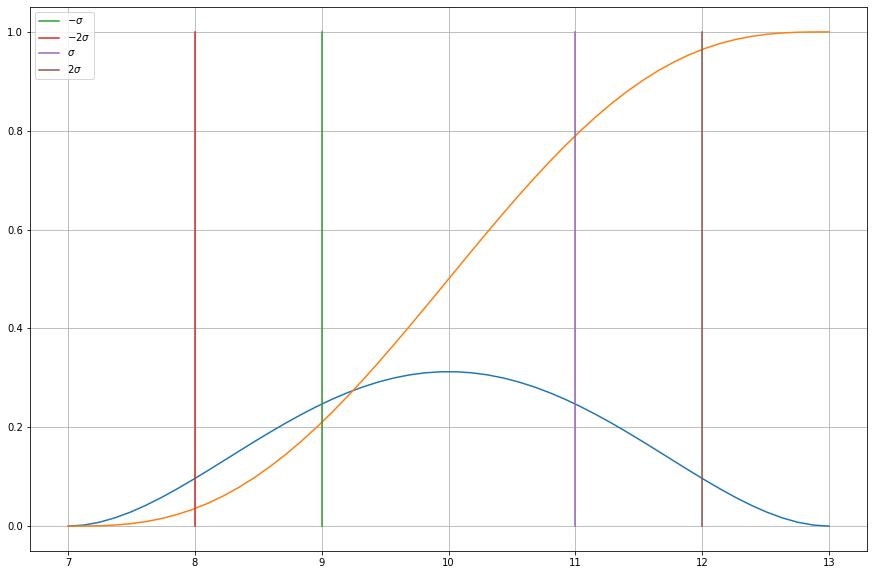

In [573]:
t = 10
sigma = 1
plotPertB(t, sigma, cdf=True)
plt.plot([t-sigma, t-sigma], [0, 1], label='$-\sigma$')
plt.plot([t-2*sigma, t-2*sigma], [0, 1], label='$-2\sigma$')
plt.plot([t+sigma, t+sigma], [0, 1], label='$\sigma$')
plt.plot([t+2*sigma, t+2*sigma], [0, 1], label='$2\sigma$')
plt.legend()

Z grafu lze vyčísti, že dokončení projektu v čase:
- $t-2\sigma$ je cca 5%,
- $t-\sigma$ je cca 20%,
- $t$ je 50%,
- $t+\sigma$ je cca 80%,
- $t+2\sigma$ je cca 95%,

### Příklad

|Id| Název| Předchůdci| Trvání|
|:-:|:-:|:-:|:-:|
|A| Výkopy| —| 2 týdny|
|B| Základní deska |A| 4 týdny|
|C| Hrubé zdění| B| 10 týdnů|
|D| Střechy| C| 6 týdnů|
|E| Vnější výplně otvorů| C| 4 týdny|
|F| Vnitřní výplně otvorů| E| 5 týdnů|
|G| Fasáda| D| 7 týdnů|
|H| Detailní vnější úpravy| E, G| 9 týdnů|
|I| Elektrické rozvody| C| 7 týdnů|
|J| Vnitřní omítky| F, I| 8 týdnů|
|K| Podlahy| J| 4 týdny|
|L| Detailní vnitřní úpravy| J| 5 týdnů|
|M| Instalace vnějšího osvětlení| H| 2 týdny|
|N| Instalace cnitřního osvětlení| K, L| 6 týdnů|

|Id | $a_i$| $b_i$ | $c_i$ | $t_i$ | $\sigma_i$  |
|:-:|:-:|---:|---:|:-:|:-:|
|A  | 1 | 2.0| 3 |   |   |
|B  | 2 | 3.5| 8 |   |   |
|C  | 6 | 9.0| 18|   |   |
|D  | 4 | 5.5| 10|   |   |
|E  | 1 | 4.5| 5 |   |   |
|F  | 4 | 4.0| 10|   |   |
|G  | 5 | 6.5| 11|   |   |
|H  | 5 | 8.0| 17|   |   |
|I  | 3 | 7.5| 9 |   |   |
|J  | 3 | 9.0| 9 |   |   |
|K  | 4 | 4.0| 4 |   |   |
|L  | 1 | 2.0| 3 |   |   |
|M  | 1 | 2.0| 3 |   |   |
|N  | 5 | 5.5| 9 |   |   |

### Příklad


|Id |   | $a_i$| $b_i$ | $c_i$ | $t_i$ | $\sigma_i$  |
|:-:|:-:|:-:|---:|---:|:-:|:-:|
|A  | -  | 2 | 5 | 14 |   |   |
|B  | -  | 1 | 10| 12 |   |   |
|C  | A  | 0 | 0 | 6  |   |   |
|D  | A  | 1 | 4 | 7  |   |   |
|E  | C  | 3 | 10| 15 |   |   |
|F  | D  | 3 | 5 | 7  |   |   |
|G  | B  | 1 | 2 | 3  |   |   |
|H  |E, F| 5 | 10| 15 |   |   |
|I  | G  | 3 | 6 | 9  |   |   |


### Příklad

|ID |Description|Predecesor|$a_i$|$b_i$|$c_i$|$t_i$|$\sigma_i$|
|:-:|:---------:|:--------:|:---:|:---:|:---:|:---:|:-:|
|1|Start|NA|0|0|0|0|
|2|Producers	asociation	organization|1|59|70|93|72|
|3|Historical	features	development|1|22|33|56|35|
|4|To	hire	expeditor|1|22|30|50|32|
|5|Twenty	beneficiaries	identification	|1|31|40|61|42|
|6|Producers	asociation	formalization|2|30|51|90|54|
|7|Cultural	features	development|3|22|33|56|35|
|8|Technical	norm	proposal	development|6,7|25|38|51|38|
|9|Technical	norm	proposal	approval|8|36|54|102|59|
|10|Ten	beneficiaries	diagnosis|4,5|25|40|55|40|
|11|Techinical	assistance	to	five	beneficiaries|10|59|70|93|72|
|12|Joining	of	five	entrepreneurs	with	exporters|11|25|35|45|35|
|13|Ten	beneficiaries	diagnosis|10|25|40|55|40|
|14|Techinical	assistance	to	five	beneficiaries|13|59|70|93|72|
15|Joining	of	five	entrepreneurs	with	exporters|14|25|35|45|35|

## Řešitel

### Formalizace zadání

In [574]:
table = [
  {'id': '1', 'label': 'Start', 'predecessors': [], 'optimistic': 0, 'mostlikely': 0, 'pesimistic': 0} , 
  {'id': '2', 'label': 'Producers asociatopn organization', 'predecessors': ['1'], 'optimistic': 59, 'mostlikely': 70, 'pesimistic': 93} , 
  {'id': '3', 'label': 'Historical features development', 'predecessors': ['1'], 'optimistic': 22, 'mostlikely': 33, 'pesimistic': 56} , 
  {'id': '4', 'label': 'To hire expeditor', 'predecessors': ['1'], 'optimistic': 22, 'mostlikely': 30, 'pesimistic': 50} , 
  {'id': '5', 'label': 'Twenty beneficiaries identification', 'predecessors': ['1'], 'optimistic': 31, 'mostlikely': 40, 'pesimistic': 61} , 
  {'id': '6', 'label': 'Producers asociation formalization', 'predecessors': ['2'], 'optimistic': 30, 'mostlikely': 51, 'pesimistic': 90} , 
  {'id': '7', 'label': 'Cultural features development', 'predecessors': ['3'], 'optimistic': 22, 'mostlikely': 33, 'pesimistic': 56} , 
  {'id': '8', 'label': 'Technical norm proposal development', 'predecessors': ['6', '7'], 'optimistic': 25, 'mostlikely': 38, 'pesimistic': 51} , 
  {'id': '9', 'label': 'Technical norm proposal approval', 'predecessors': ['8'], 'optimistic': 36, 'mostlikely': 54, 'pesimistic': 102} , 
  {'id': '10', 'label': 'Ten beneficiaries diagnosis', 'predecessors': ['4', '5'], 'optimistic': 25, 'mostlikely': 40, 'pesimistic': 55} , 
  {'id': '11', 'label': 'Techinical assistance to five beneficiaries', 'predecessors': ['10'], 'optimistic': 59, 'mostlikely': 70, 'pesimistic': 93} , 
  {'id': '12', 'label': 'Joining of five entrepreneurs with exporters', 'predecessors': ['11'], 'optimistic': 25, 'mostlikely': 35, 'pesimistic': 45} , 
  {'id': '13', 'label': 'Ten beneficiaries diagnosis', 'predecessors': ['10'], 'optimistic': 25, 'mostlikely': 40, 'pesimistic': 55} , 
  {'id': '14', 'label': 'Techinical assistance to five beneficiaries', 'predecessors': ['13'], 'optimistic': 59, 'mostlikely': 70, 'pesimistic': 93} , 
  {'id': '15', 'label': 'Joining of five entrepreneurs with exporters', 'predecessors': ['14'], 'optimistic': 25, 'mostlikely': 35, 'pesimistic': 45} , 
]

### Tisk výsledků

In [575]:
import pandas as pd
def printTable(table):
  df = pd.DataFrame(table)
  display(df)

printTable(table)  

,id,label,predecessors,optimistic,mostlikely,pesimistic
0,1,Start,[],0,0,0
1,2,Producers asociatopn organization,[1],59,70,93
2,3,Historical features development,[1],22,33,56
3,4,To hire expeditor,[1],22,30,50
4,5,Twenty beneficiaries identification,[1],31,40,61
5,6,Producers asociation formalization,[2],30,51,90
6,7,Cultural features development,[3],22,33,56
7,8,Technical norm proposal development,"[6, 7]",25,38,51
8,9,Technical norm proposal approval,[8],36,54,102
9,10,Ten beneficiaries diagnosis,"[4, 5]",25,40,55


### Získání řádku s id

In [576]:
def retrieveRecord(table, id):
  for row in table:
    if row['id'] == id:
      return row
  return None

### Inicializace $t$ a $\sigma$

In [577]:
def calculateTAndSigma(table):
  result = []
  for item in table:
    a = item['optimistic']
    b = item['mostlikely']
    c = item['pesimistic']
    t = (a + 4 * b + c) / 6
    sigma = (c - a) / 6
    newItem = {**item, 't': t, 'sigma': sigma, 'successors': [], 'cSigma': None}
    result.append(newItem)
  return result

In [578]:
table = calculateTAndSigma(table)  
printTable(table)

,id,label,predecessors,optimistic,mostlikely,pesimistic,t,sigma,successors,cSigma
0,1,Start,[],0,0,0,0.0,0.000000,[],None
1,2,Producers asociatopn organization,[1],59,70,93,72.0,5.666667,[],None
2,3,Historical features development,[1],22,33,56,35.0,5.666667,[],None
3,4,To hire expeditor,[1],22,30,50,32.0,4.666667,[],None
4,5,Twenty beneficiaries identification,[1],31,40,61,42.0,5.000000,[],None
5,6,Producers asociation formalization,[2],30,51,90,54.0,10.000000,[],None
6,7,Cultural features development,[3],22,33,56,35.0,5.666667,[],None
7,8,Technical norm proposal development,"[6, 7]",25,38,51,38.0,4.333333,[],None
8,9,Technical norm proposal approval,[8],36,54,102,59.0,11.000000,[],None
9,10,Ten beneficiaries diagnosis,"[4, 5]",25,40,55,40.0,5.000000,[],None


### Identifikace následovníků

In [579]:
def calculateSuccessors(table):
  result = []
  for row in table:
    newRow = {**row}
    result.append(newRow)
  for row in result:
    for predecessorId in row['predecessors']:
      pRow = retrieveRecord(result, predecessorId)
      pRow['successors'].append(row['id'])
  return result

In [580]:
table = calculateSuccessors(table)
printTable(table)

,id,label,predecessors,optimistic,mostlikely,pesimistic,t,sigma,successors,cSigma
0,1,Start,[],0,0,0,0.0,0.000000,"[2, 3, 4, 5]",None
1,2,Producers asociatopn organization,[1],59,70,93,72.0,5.666667,[6],None
2,3,Historical features development,[1],22,33,56,35.0,5.666667,[7],None
3,4,To hire expeditor,[1],22,30,50,32.0,4.666667,[10],None
4,5,Twenty beneficiaries identification,[1],31,40,61,42.0,5.000000,[10],None
5,6,Producers asociation formalization,[2],30,51,90,54.0,10.000000,[8],None
6,7,Cultural features development,[3],22,33,56,35.0,5.666667,[8],None
7,8,Technical norm proposal development,"[6, 7]",25,38,51,38.0,4.333333,[9],None
8,9,Technical norm proposal approval,[8],36,54,102,59.0,11.000000,[],None
9,10,Ten beneficiaries diagnosis,"[4, 5]",25,40,55,40.0,5.000000,"[11, 13]",None


### Jeden krok výpočtu

In [581]:
from math import sqrt
def calculateTimeForward(table, id):
  result = []
  for row in table:
    if row['id'] == id:

      predecessors = row['predecessors']
      earlyStart = 0
      cumulativeSigma = row['sigma']
      for predecessorId in predecessors:
        predecestor = retrieveRecord(table, predecessorId)
        if not 'earlyEnd' in predecestor:
          return table, predecessorId
        if earlyStart < predecestor['earlyEnd']:
          earlyStart = predecestor['earlyEnd']
          cumulativeSigma = predecestor['cSigma']
      cSigma = sqrt(row['sigma'] * row['sigma'] + cumulativeSigma * cumulativeSigma)
      newRow = {**row, 'cSigma': cSigma, 'earlyStart': earlyStart, 'earlyEnd': earlyStart + row['t']}
      result.append(newRow)
    else:
      result.append({**row})
  return result, id 

In [582]:
table, id = calculateTimeForward(table, table[0]['id'])  
print(id)
printTable(table)

1


,id,label,predecessors,optimistic,mostlikely,pesimistic,t,sigma,successors,cSigma,earlyStart,earlyEnd
0,1,Start,[],0,0,0,0.0,0.000000,"[2, 3, 4, 5]",0.0,0.0,0.0
1,2,Producers asociatopn organization,[1],59,70,93,72.0,5.666667,[6],NaN,NaN,NaN
2,3,Historical features development,[1],22,33,56,35.0,5.666667,[7],NaN,NaN,NaN
3,4,To hire expeditor,[1],22,30,50,32.0,4.666667,[10],NaN,NaN,NaN
4,5,Twenty beneficiaries identification,[1],31,40,61,42.0,5.000000,[10],NaN,NaN,NaN
5,6,Producers asociation formalization,[2],30,51,90,54.0,10.000000,[8],NaN,NaN,NaN
6,7,Cultural features development,[3],22,33,56,35.0,5.666667,[8],NaN,NaN,NaN
7,8,Technical norm proposal development,"[6, 7]",25,38,51,38.0,4.333333,[9],NaN,NaN,NaN
8,9,Technical norm proposal approval,[8],36,54,102,59.0,11.000000,[],NaN,NaN,NaN
9,10,Ten beneficiaries diagnosis,"[4, 5]",25,40,55,40.0,5.000000,"[11, 13]",NaN,NaN,NaN


In [583]:
table, id = calculateTimeForward(table, table[1]['id'])  
print(id)
printTable(table)

2


,id,label,predecessors,optimistic,mostlikely,pesimistic,t,sigma,successors,cSigma,earlyStart,earlyEnd
0,1,Start,[],0,0,0,0.0,0.000000,"[2, 3, 4, 5]",0.000000,0.0,0.0
1,2,Producers asociatopn organization,[1],59,70,93,72.0,5.666667,[6],8.013877,0.0,72.0
2,3,Historical features development,[1],22,33,56,35.0,5.666667,[7],NaN,NaN,NaN
3,4,To hire expeditor,[1],22,30,50,32.0,4.666667,[10],NaN,NaN,NaN
4,5,Twenty beneficiaries identification,[1],31,40,61,42.0,5.000000,[10],NaN,NaN,NaN
5,6,Producers asociation formalization,[2],30,51,90,54.0,10.000000,[8],NaN,NaN,NaN
6,7,Cultural features development,[3],22,33,56,35.0,5.666667,[8],NaN,NaN,NaN
7,8,Technical norm proposal development,"[6, 7]",25,38,51,38.0,4.333333,[9],NaN,NaN,NaN
8,9,Technical norm proposal approval,[8],36,54,102,59.0,11.000000,[],NaN,NaN,NaN
9,10,Ten beneficiaries diagnosis,"[4, 5]",25,40,55,40.0,5.000000,"[11, 13]",NaN,NaN,NaN


### Výpočet všech etap

In [584]:
def calculateForwardAll(table):
  currentTable = table
  lastId = currentTable[-1]['id']
  while True:
    somethingChanged = False
    for row in currentTable:
      id = row['id']
      newTable, newId = calculateTimeForward(currentTable, id)
      if (newId == id) & (not newTable == currentTable):
        currentTable = newTable
        somethingChanged = True
        break
    if not somethingChanged:
      break;
  return currentTable

In [585]:
table = calculateForwardAll(table)
printTable(table)

,id,label,predecessors,optimistic,mostlikely,pesimistic,t,sigma,successors,cSigma,earlyStart,earlyEnd
0,1,Start,[],0,0,0,0.0,0.000000,"[2, 3, 4, 5]",0.000000,0.0,0.0
1,2,Producers asociatopn organization,[1],59,70,93,72.0,5.666667,[6],8.013877,0.0,72.0
2,3,Historical features development,[1],22,33,56,35.0,5.666667,[7],8.013877,0.0,35.0
3,4,To hire expeditor,[1],22,30,50,32.0,4.666667,[10],6.599663,0.0,32.0
4,5,Twenty beneficiaries identification,[1],31,40,61,42.0,5.000000,[10],7.071068,0.0,42.0
5,6,Producers asociation formalization,[2],30,51,90,54.0,10.000000,[8],12.814922,72.0,126.0
6,7,Cultural features development,[3],22,33,56,35.0,5.666667,[8],9.814955,35.0,70.0
7,8,Technical norm proposal development,"[6, 7]",25,38,51,38.0,4.333333,[9],13.527749,126.0,164.0
8,9,Technical norm proposal approval,[8],36,54,102,59.0,11.000000,[],17.435596,164.0,223.0
9,10,Ten beneficiaries diagnosis,"[4, 5]",25,40,55,40.0,5.000000,"[11, 13]",8.660254,42.0,82.0


### Odvození trvání projektu

In [586]:
def calculateDuration(table):
  result = 0
  for row in table:
    if row['earlyEnd'] > result:
      result = row['earlyEnd']

  return result

In [587]:
projectDuration = calculateDuration(table)
print(projectDuration)

229.0


### Poznamenání doby trvání projektu

In [588]:
def storeProjectDuration(table):
  duration = calculateDuration(table)
  result = []
  for row in table:
    newRow = {**row}
    if len(row['successors']) == 0:
      newRow['lastlyEnd'] = duration
      newRow['lastlyBegin'] = duration - newRow['t']
    result.append(newRow)
  return result

In [589]:
table = storeProjectDuration(table)
printTable(table)

,id,label,predecessors,optimistic,mostlikely,pesimistic,t,sigma,successors,cSigma,earlyStart,earlyEnd,lastlyEnd,lastlyBegin
0,1,Start,[],0,0,0,0.0,0.000000,"[2, 3, 4, 5]",0.000000,0.0,0.0,NaN,NaN
1,2,Producers asociatopn organization,[1],59,70,93,72.0,5.666667,[6],8.013877,0.0,72.0,NaN,NaN
2,3,Historical features development,[1],22,33,56,35.0,5.666667,[7],8.013877,0.0,35.0,NaN,NaN
3,4,To hire expeditor,[1],22,30,50,32.0,4.666667,[10],6.599663,0.0,32.0,NaN,NaN
4,5,Twenty beneficiaries identification,[1],31,40,61,42.0,5.000000,[10],7.071068,0.0,42.0,NaN,NaN
5,6,Producers asociation formalization,[2],30,51,90,54.0,10.000000,[8],12.814922,72.0,126.0,NaN,NaN
6,7,Cultural features development,[3],22,33,56,35.0,5.666667,[8],9.814955,35.0,70.0,NaN,NaN
7,8,Technical norm proposal development,"[6, 7]",25,38,51,38.0,4.333333,[9],13.527749,126.0,164.0,NaN,NaN
8,9,Technical norm proposal approval,[8],36,54,102,59.0,11.000000,[],17.435596,164.0,223.0,229.0,170.0
9,10,Ten beneficiaries diagnosis,"[4, 5]",25,40,55,40.0,5.000000,"[11, 13]",8.660254,42.0,82.0,NaN,NaN


### Jeden krok zpětného vyhodnocení

In [590]:
def calculateTimeBackward(table, id):
  result = []
  for row in table:
    if row['id'] == id:

      successors = row['successors']
      lastlyEnd = row['earlyEnd'] + 1000
      for successorId in successors:
        successor = retrieveRecord(table, successorId)
        if not 'lastlyBegin' in successor:
          return table, successorId
        elif lastlyEnd > successor['lastlyBegin']:
          lastlyEnd = successor['lastlyBegin']
      newRow = {**row, 'lastlyEnd': lastlyEnd, 'lastlyBegin': lastlyEnd - row['t']}
      result.append(newRow)
    else:
      result.append({**row})
  return result, id 

In [591]:
table, id = calculateTimeBackward(table, table[-2]['id'])
print(id)
printTable(table)

14


,id,label,predecessors,optimistic,mostlikely,pesimistic,t,sigma,successors,cSigma,earlyStart,earlyEnd,lastlyEnd,lastlyBegin
0,1,Start,[],0,0,0,0.0,0.000000,"[2, 3, 4, 5]",0.000000,0.0,0.0,NaN,NaN
1,2,Producers asociatopn organization,[1],59,70,93,72.0,5.666667,[6],8.013877,0.0,72.0,NaN,NaN
2,3,Historical features development,[1],22,33,56,35.0,5.666667,[7],8.013877,0.0,35.0,NaN,NaN
3,4,To hire expeditor,[1],22,30,50,32.0,4.666667,[10],6.599663,0.0,32.0,NaN,NaN
4,5,Twenty beneficiaries identification,[1],31,40,61,42.0,5.000000,[10],7.071068,0.0,42.0,NaN,NaN
5,6,Producers asociation formalization,[2],30,51,90,54.0,10.000000,[8],12.814922,72.0,126.0,NaN,NaN
6,7,Cultural features development,[3],22,33,56,35.0,5.666667,[8],9.814955,35.0,70.0,NaN,NaN
7,8,Technical norm proposal development,"[6, 7]",25,38,51,38.0,4.333333,[9],13.527749,126.0,164.0,NaN,NaN
8,9,Technical norm proposal approval,[8],36,54,102,59.0,11.000000,[],17.435596,164.0,223.0,229.0,170.0
9,10,Ten beneficiaries diagnosis,"[4, 5]",25,40,55,40.0,5.000000,"[11, 13]",8.660254,42.0,82.0,NaN,NaN


### Kompletní zpětné vyhodnocení

In [592]:
def calculateTimeBackwardAll(table):
  currentTable = table
  while True:
    somethingChanged = False
    for row in currentTable:
      id = row['id']
      if 'lastlyBegin' in row:
        continue
      newTable, newId = calculateTimeBackward(currentTable, id)
      if (newId == id) & (not newTable == currentTable):
        currentTable = newTable
        somethingChanged = True
        break
    if not somethingChanged:
      break;
  return currentTable 

In [593]:
table = calculateTimeBackwardAll(table)
printTable(table) 

,id,label,predecessors,optimistic,mostlikely,pesimistic,t,sigma,successors,cSigma,earlyStart,earlyEnd,lastlyEnd,lastlyBegin
0,1,Start,[],0,0,0,0.0,0.000000,"[2, 3, 4, 5]",0.000000,0.0,0.0,0.0,0.0
1,2,Producers asociatopn organization,[1],59,70,93,72.0,5.666667,[6],8.013877,0.0,72.0,78.0,6.0
2,3,Historical features development,[1],22,33,56,35.0,5.666667,[7],8.013877,0.0,35.0,97.0,62.0
3,4,To hire expeditor,[1],22,30,50,32.0,4.666667,[10],6.599663,0.0,32.0,42.0,10.0
4,5,Twenty beneficiaries identification,[1],31,40,61,42.0,5.000000,[10],7.071068,0.0,42.0,42.0,0.0
5,6,Producers asociation formalization,[2],30,51,90,54.0,10.000000,[8],12.814922,72.0,126.0,132.0,78.0
6,7,Cultural features development,[3],22,33,56,35.0,5.666667,[8],9.814955,35.0,70.0,132.0,97.0
7,8,Technical norm proposal development,"[6, 7]",25,38,51,38.0,4.333333,[9],13.527749,126.0,164.0,170.0,132.0
8,9,Technical norm proposal approval,[8],36,54,102,59.0,11.000000,[],17.435596,164.0,223.0,229.0,170.0
9,10,Ten beneficiaries diagnosis,"[4, 5]",25,40,55,40.0,5.000000,"[11, 13]",8.660254,42.0,82.0,82.0,42.0


### Evaluace rezerv

In [594]:
def calculateSpareTime(table):
  result = []
  for row in table:
    newRow = {**row, 'sTime': row['lastlyEnd'] - row['earlyEnd']}
    result.append(newRow)
  return result

In [595]:
table = calculateSpareTime(table)
printTable(table) 

,id,label,predecessors,optimistic,mostlikely,pesimistic,t,sigma,successors,cSigma,earlyStart,earlyEnd,lastlyEnd,lastlyBegin,sTime
0,1,Start,[],0,0,0,0.0,0.000000,"[2, 3, 4, 5]",0.000000,0.0,0.0,0.0,0.0,0.0
1,2,Producers asociatopn organization,[1],59,70,93,72.0,5.666667,[6],8.013877,0.0,72.0,78.0,6.0,6.0
2,3,Historical features development,[1],22,33,56,35.0,5.666667,[7],8.013877,0.0,35.0,97.0,62.0,62.0
3,4,To hire expeditor,[1],22,30,50,32.0,4.666667,[10],6.599663,0.0,32.0,42.0,10.0,10.0
4,5,Twenty beneficiaries identification,[1],31,40,61,42.0,5.000000,[10],7.071068,0.0,42.0,42.0,0.0,0.0
5,6,Producers asociation formalization,[2],30,51,90,54.0,10.000000,[8],12.814922,72.0,126.0,132.0,78.0,6.0
6,7,Cultural features development,[3],22,33,56,35.0,5.666667,[8],9.814955,35.0,70.0,132.0,97.0,62.0
7,8,Technical norm proposal development,"[6, 7]",25,38,51,38.0,4.333333,[9],13.527749,126.0,164.0,170.0,132.0,6.0
8,9,Technical norm proposal approval,[8],36,54,102,59.0,11.000000,[],17.435596,164.0,223.0,229.0,170.0,6.0
9,10,Ten beneficiaries diagnosis,"[4, 5]",25,40,55,40.0,5.000000,"[11, 13]",8.660254,42.0,82.0,82.0,42.0,0.0


### Kritická cesta

In [596]:
def criticalPath(table):
  result = []
  for row in table:
    if row['sTime'] == 0:
      result.append(row)
  return result

In [612]:
cp = criticalPath(table)
printTable(cp)

,id,label,predecessors,optimistic,mostlikely,pesimistic,t,sigma,successors,cSigma,earlyStart,earlyEnd,lastlyEnd,lastlyBegin,sTime
0,1,Start,[],0,0,0,0.0,0.000000,"[2, 3, 4, 5]",0.000000,0.0,0.0,0.0,0.0,0.0
1,5,Twenty beneficiaries identification,[1],31,40,61,42.0,5.000000,[10],7.071068,0.0,42.0,42.0,0.0,0.0
2,10,Ten beneficiaries diagnosis,"[4, 5]",25,40,55,40.0,5.000000,"[11, 13]",8.660254,42.0,82.0,82.0,42.0,0.0
3,13,Ten beneficiaries diagnosis,[10],25,40,55,40.0,5.000000,[14],10.000000,82.0,122.0,122.0,82.0,0.0
4,14,Techinical assistance to five beneficiaries,[13],59,70,93,72.0,5.666667,[15],11.493960,122.0,194.0,194.0,122.0,0.0
5,15,Joining of five entrepreneurs with exporters,[14],25,35,45,35.0,3.333333,[],11.967549,194.0,229.0,229.0,194.0,0.0


### Pravděpodobnostní vyhodnocení

In [598]:
def getProjectCharacteristics(table):
  maxEnd = 0
  maxSigma = 0
  for row in criticalPath(table):
    if row['earlyEnd'] > maxEnd:
      maxEnd = row['earlyEnd']
      maxSigma = row['cSigma']
  return maxEnd, maxSigma

maxEnd, maxSigma = getProjectCharacteristics(table)
print(f'Délka trvání projektu t={maxEnd}, sigma={maxSigma:.2f}')

Délka trvání projektu t=229.0, sigma=11.97


### Pravděpodobnostní křivka

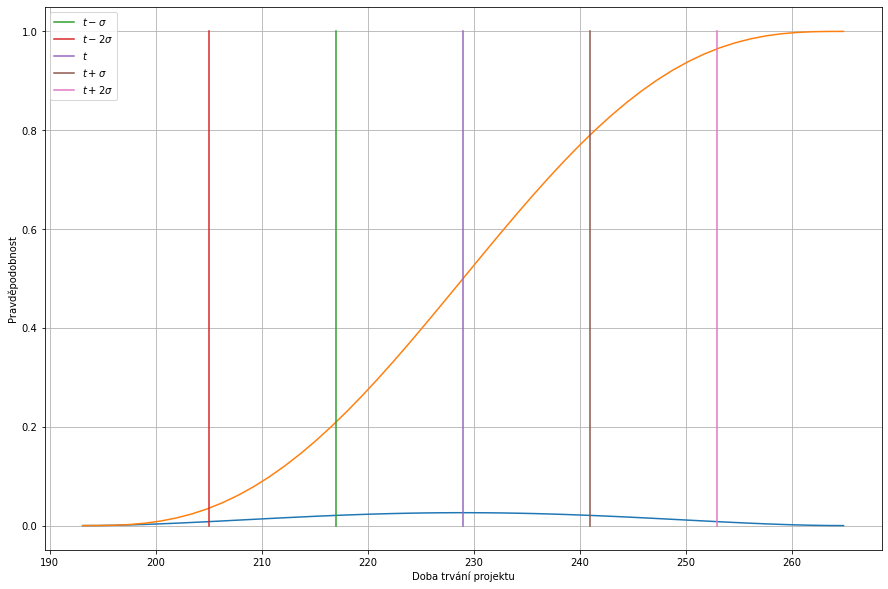

In [599]:
t = maxEnd
sigma = maxSigma
plotPertB(t, sigma, cdf=True)
plt.plot([t-sigma, t-sigma], [0, 1], label='$t-\sigma$')
plt.plot([t-2*sigma, t-2*sigma], [0, 1], label='$t-2\sigma$')
plt.plot([t, t], [0, 1], label='$t$')
plt.plot([t+sigma, t+sigma], [0, 1], label='$t+\sigma$')
plt.plot([t+2*sigma, t+2*sigma], [0, 1], label='$t+2\sigma$')
plt.xlabel('Doba trvání projektu')
plt.ylabel('Pravděpodobnost')
plt.legend();

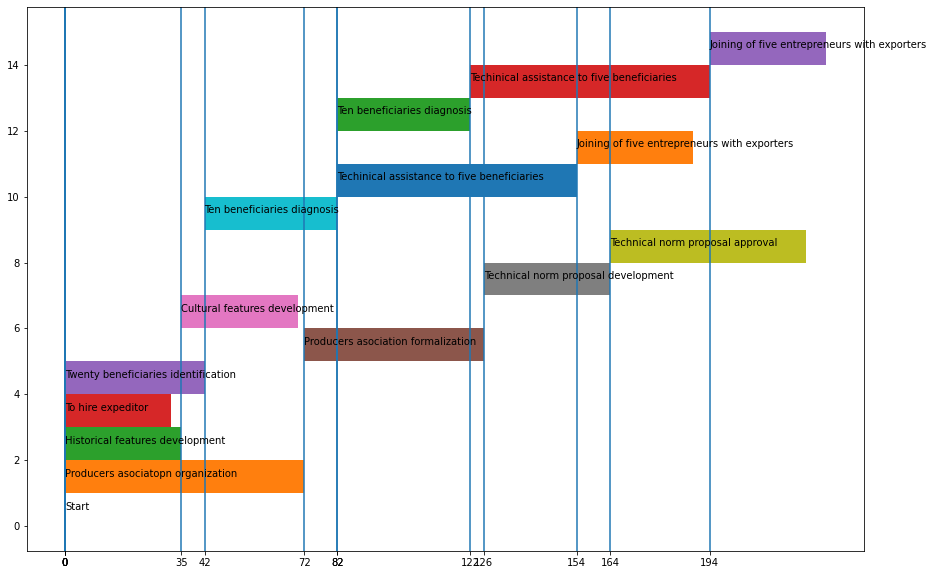

In [611]:
def rectangle(xb, y, xe, *args):
  plt.fill([xb, xe, xe, xb], [y, y, y+1, y+1], *args)

def plotIt(table):
  xx = []
  for index, row in enumerate(table):
    x = row['earlyStart']
    xx.append(x)
    y = index
    rectangle(x, y, row['earlyEnd'])
    plt.text(x, y + 0.5, row['label'])
    plt.axvline(x=x)
  
  plt.xticks(xx)

plotIt(table)    